## 1. Sequential API와 비교

In [1]:
from tensorflow.keras import Input
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.layers import Dense

- Sequential API

In [2]:
seq_model = Sequential()
seq_model.add(Dense(32, activation='relu', input_shape=(64,)))
seq_model.add(Dense(32, activation='relu'))
seq_model.add(Dense(10, activation='relu'))
seq_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 32)                2080      
_________________________________________________________________
dense_1 (Dense)              (None, 32)                1056      
_________________________________________________________________
dense_2 (Dense)              (None, 10)                330       
Total params: 3,466
Trainable params: 3,466
Non-trainable params: 0
_________________________________________________________________


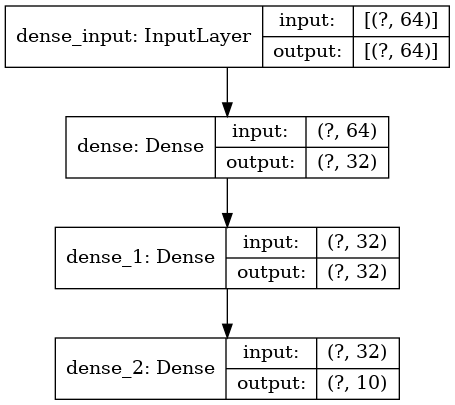

In [3]:
from tensorflow.keras.utils import plot_model
plot_model(seq_model, show_shapes=True)

- Functional API

In [4]:
input_tensor = Input(shape=(64,))
x = Dense(32, activation='relu')(input_tensor)
x = Dense(32, activation='relu')(x)
output_tensor = Dense(10, activation='softmax')(x)

model = Model(input_tensor, output_tensor)
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 64)]              0         
_________________________________________________________________
dense_3 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_4 (Dense)              (None, 32)                1056      
_________________________________________________________________
dense_5 (Dense)              (None, 10)                330       
Total params: 3,466
Trainable params: 3,466
Non-trainable params: 0
_________________________________________________________________


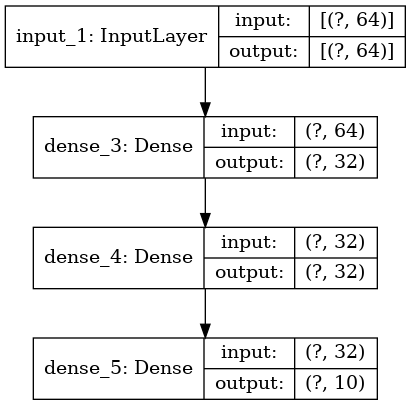

In [5]:
from tensorflow.keras.utils import plot_model
plot_model(model, show_shapes=True)

## 2. 다중입력모델

In [6]:
from tensorflow.keras import Input
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, LSTM, Embedding, concatenate

In [7]:
text_voca_size = 10000
question_voca_size = 10000
ans_voca_size = 500

In [8]:
text_input = Input(shape=(None,), dtype='int32', name='text')
embed_text = Embedding(text_voca_size, 64)(text_input)
encoded_text = LSTM(32)(embed_text)

question_input = Input(shape=(None,), dtype='int32', name='question')
embed_question = Embedding(question_voca_size, 32)(question_input)
encoded_question = LSTM(16)(embed_question)

concat = concatenate([encoded_text, encoded_question], axis=-1)

answer = Dense(ans_voca_size, activation='softmax')(concat)

model = Model([text_input, question_input], answer)
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
text (InputLayer)               [(None, None)]       0                                            
__________________________________________________________________________________________________
question (InputLayer)           [(None, None)]       0                                            
__________________________________________________________________________________________________
embedding (Embedding)           (None, None, 64)     640000      text[0][0]                       
__________________________________________________________________________________________________
embedding_1 (Embedding)         (None, None, 32)     320000      question[0][0]                   
____________________________________________________________________________________________

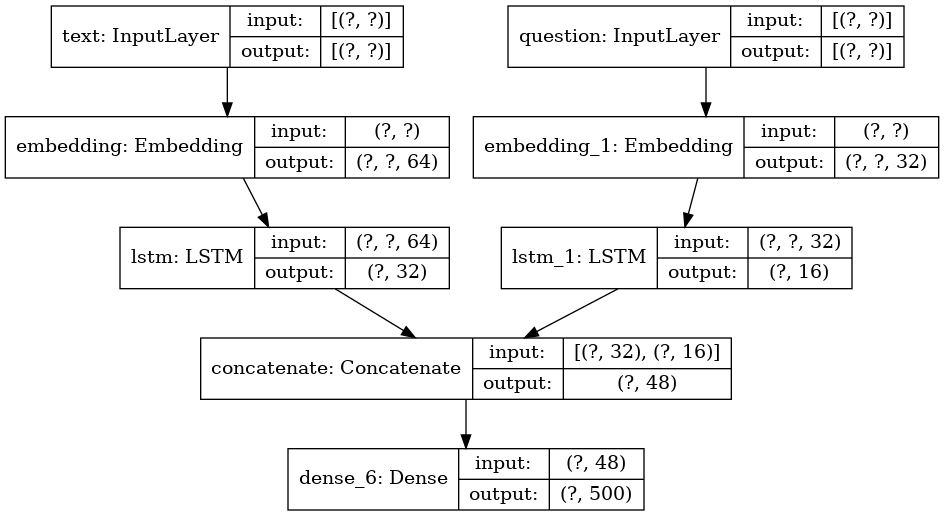

In [9]:
from tensorflow.keras.utils import plot_model
plot_model(model, show_shapes=True)

In [10]:
#model.fit([text, question], answer, epochs=10, batch_size=128)
#model.fit({'text':text, 'question':question}, answer, epochs=10, batch_size=128)

## 3. 다중출력모델

In [11]:
from tensorflow.keras import Input
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Embedding, Conv1D, MaxPooling1D, GlobalMaxPooling1D

In [12]:
voca_size = 50000
num_income_groups = 10

posts_input = Input(shape=(None,), dtype='int32', name='posts')
embed_posts = Embedding(voca_size, 256)(posts_input)
x = Conv1D(128, 5, activation='relu')(embed_posts)
x = MaxPooling1D(5)(x)
x = Conv1D(256, 5, activation='relu')(x)
x = Conv1D(256, 5, activation='relu')(x)
x = MaxPooling1D(5)(x)
x = Conv1D(256, 5, activation='relu')(x)
x = Conv1D(256, 5, activation='relu')(x)
x = GlobalMaxPooling1D()(x)
x = Dense(128, activation='relu')(x)

age_pred = Dense(1, name='age')(x)
income_pred = Dense(num_income_groups, activation='softmax', name='income')(x)
gender_pred = Dense(1, activation='sigmoid', name='gender')(x)

model = Model(posts_input, [age_pred, income_pred, gender_pred])
model.summary()

Model: "model_2"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
posts (InputLayer)              [(None, None)]       0                                            
__________________________________________________________________________________________________
embedding_2 (Embedding)         (None, None, 256)    12800000    posts[0][0]                      
__________________________________________________________________________________________________
conv1d (Conv1D)                 (None, None, 128)    163968      embedding_2[0][0]                
__________________________________________________________________________________________________
max_pooling1d (MaxPooling1D)    (None, None, 128)    0           conv1d[0][0]                     
____________________________________________________________________________________________

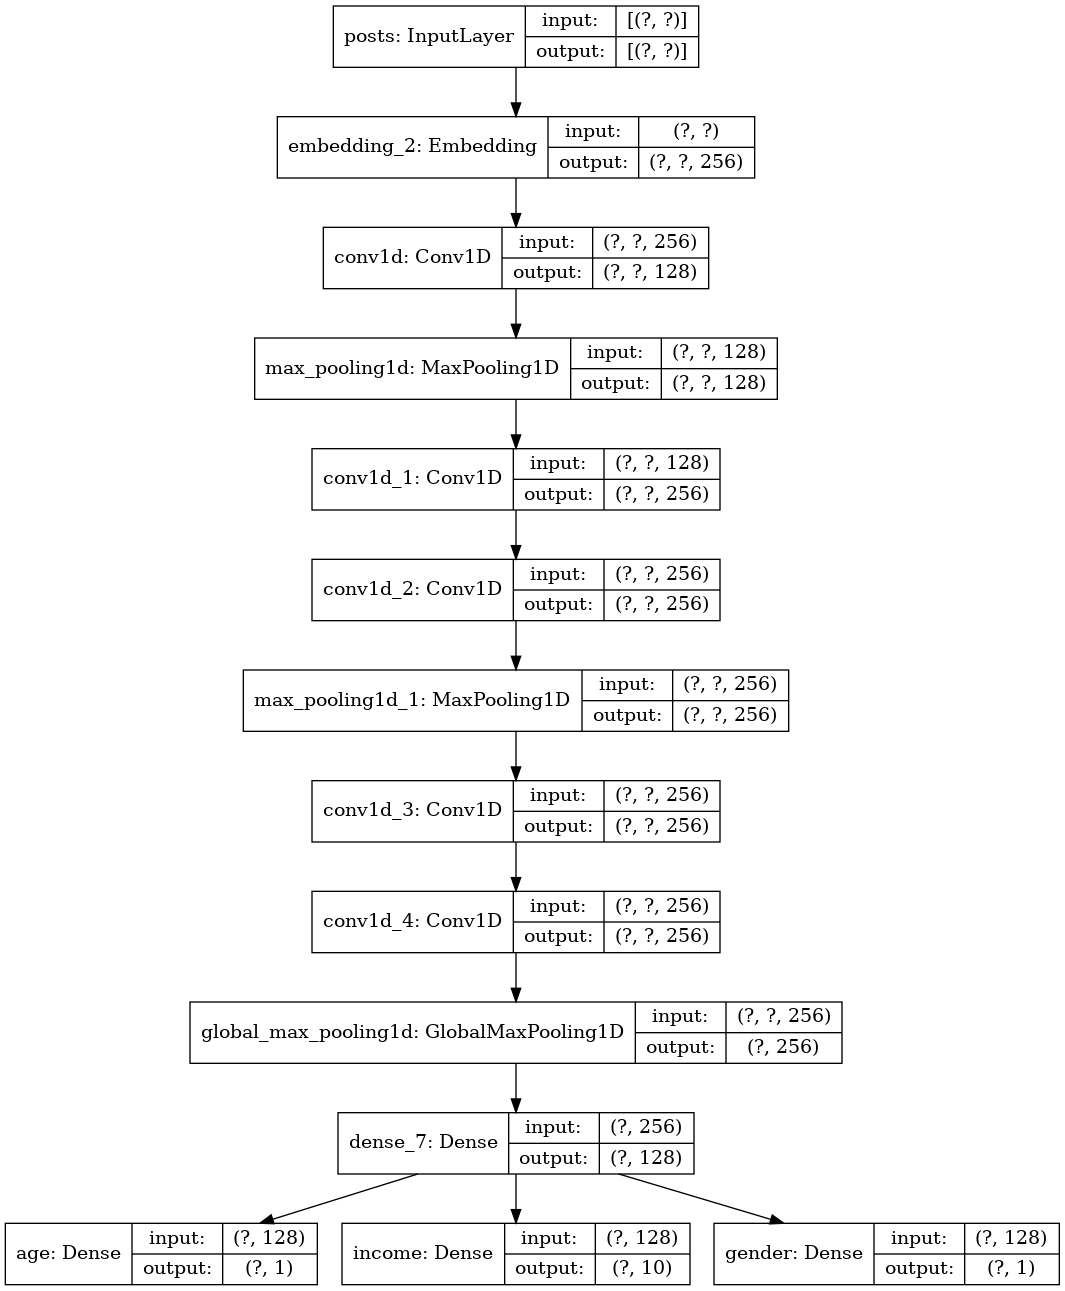

In [13]:
from tensorflow.keras.utils import plot_model
plot_model(model, show_shapes=True)

In [14]:
model.compile(optimizer='rmsprop', loss=['mse', 'categorical_crossentropy', 'binary_crossentropy'])
model.compile(optimizer='rmsprop', loss={'age':'mse',
                                        'income':'categorical_crossentropy',
                                        'gender':'binary_crossentropy'})

In [15]:
model.compile(optimizer='rmsprop', loss=['mse', 'categorical_crossentropy', 'binary_crossentropy'], 
              loss_weights=[0.25, 1., 10.])
model.compile(optimizer='rmsprop', loss={'age':'mse',
                                        'income':'categorical_crossentropy',
                                        'gender':'binary_crossentropy'},
                                   loss_weights={'age': 0.25, 
                                                 'income':1.,
                                                 'gender':10.})

In [16]:
#model.fit(posts, [age_target, income_target, gender_target], epochs=10, batch_size=128)
#model.fit(posts, {'age':age_target, 'income':income_target, 'gender':gender_target}, epochs=10, batch_size=128)